# Probability Distributions

### Four Most Common Distributions 

*Uniform - have equal likelihood, like a coin

*Normal - model continuous random variable

*Binomial - binary outcome of an event.. success/failure

*Poisson - certain number of events occurring over a time interval

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

In [10]:
np.random.seed(123)

### Uniform Distribution 

An example of an event that can be modeled with the uniform distribution is the outcome of rolling a 6-sided die.

### Examples of different distributions in SciPy

*rvs

*pmf / pdf

*cdf / ppf

*sf / isf

In [6]:
die_distribution = stats.randint(1, 7)

### Random Values

In [7]:
die_distribution.rvs()

6

In [8]:
die_distribution.rvs(5)

array([3, 5, 3, 2, 4])

In [9]:
die_distribution.rvs((5,5))

array([[3, 4, 2, 2, 1],
       [2, 2, 1, 1, 2],
       [4, 6, 5, 1, 1],
       [5, 2, 4, 3, 5],
       [3, 5, 1, 6, 1]])

Text(0.5, 1.0, 'Outcome of 10,000 Dice Rolls')

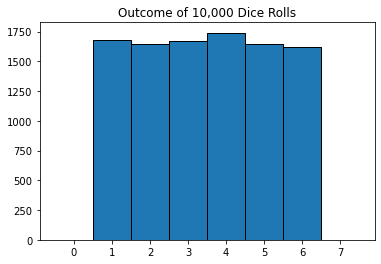

In [10]:
n = 10_000

x= die_distribution.rvs(n)

plt.hist(x, bins=range(0, 9), align='left', width=1, edgecolor='black')
plt.title(f'Outcome of {n:,} Dice Rolls')

### PMF / PDF

Probability of any single outcome, like rolling a 3 on a dice 

In [11]:
die_distribution.pmf(3)

0.16666666666666666

In [12]:
die_distribution.pmf([1, 2, 3])

array([0.16666667, 0.16666667, 0.16666667])

### CDF PPF 

Likelihood of a single outcome or all the results below. IE: What's the probability of rolling a 3 or lower?

In [14]:
#3 or lower is half the outcomes and therefore a 50% probability 
die_distribution.cdf(3)

0.5

### PPF

Also known as quantile function, can be thought of as inverse of cdf: takes in probability 

In [21]:
die_distribution.ppf(5/6)

5.0

### SF / ISF

Survival function: IE "What is the likelihood of rolling a value higher than 4?"

In [16]:
die_distribution.sf(4)

0.33333333333333337

In [17]:
# There is a 1/3 chance a dice roll will be higher than what value?
die_distribution.isf(1/3)

4.0

# Binomial Distribution

### Model Number of Successes After a Number of Trials - Given A Certain Probability of Success

For example:

You are taking a multiple choice test consisting of 30 questions that you forgot to study for. Each question has 4 possible answers and you will choose one at random. What is the probability you get more than 10 of the questions right?

Here we have a probability of success, 0.25, and a number of trials, 30. We'll define X as the number of questions we get right on the test. We want to know the probability that X > 10, which tells us we want to use the survival function.

In [18]:
stats.binom(30, .25).sf(10)

0.10572812269266013

You have just over a 10% probability of getting more than 10 questions correct 

Suppose in a class of 20 there is a 5% chance of a student showing up late. What are the odds a student shows up late? 

In [20]:
stats.binom(20, .05).pmf(1)

0.37735360253530753

In [ ]:
There is a 37% chance of one person showing up late

# Normal Distribution

The normal distribution models a continuous random variable where the further away from the mean you are, the less likely the outcome. This is commonly referred to as the 'bell curve'.

A normal distribution is defined by a mean and a standard deviation. The standard normal distribution is a normal distribution with a mean of 0 and standard deviation of 1.

Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars. How much would the daily sales have to be to be in the top 10% of all days?

In [23]:
μ = 12000
σ = 2000

sales = stats.norm(μ, σ)

top_10_percent_cutoff = sales.ppf(.9)

print('${:,.2f}'.format(top_10_percent_cutoff))

$14,563.10


How likely is it that the store sells less than 10,000 dollars one day?

In [24]:
p = sales.cdf(10_000)

print(f'Ony any given day, there\'s a {p:.1%} chance we sell less than $10,000.')

Ony any given day, there's a 15.9% chance we sell less than $10,000.


# Poisson Distribution

The poisson distribution lets us model a situation where a certain number of events happen over a specified time interval. The number of events that happen is a discrete measure, and this distribution can tell us the likelihood of a certain number of events occuring over a time period.

The poisson distribution assumes that the events are independent of each other and independent of the time since the last event. We must also know the average rate to use a poisson distribution.

Think of: 

Number of emails sent by a mail server in a day, number of phone calls received by a call center per hour, number of decay events per second from a radioactive source

Example: Codeup knows that, on average, students consume 5 lbs of coffee per week. How likely is it that the coffee consumption for this week is only 3 lbs?

In [25]:
stats.poisson(5).pmf(3)

0.1403738958142805

Example: What is the likelihood that more than 7 lbs of coffee are consumed?

In [26]:
stats.poisson(5).sf(7)

0.13337167407000744

# Problem Set 

Question 1

<BarContainer object of 12 artists>

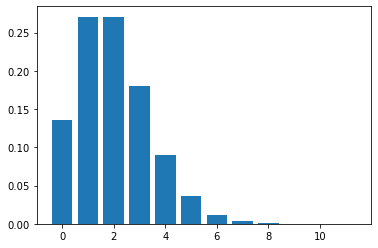

In [53]:
mean = 2 
x = np.arange(0,12)
y = stats.poisson(mean).pmf(x)
plt.bar(x,y)

What is the probability that no cars drive up in the noon hour?

In [31]:
stats.poisson(2).pmf(0)

0.1353352832366127

What is the probability that 3 or more cars come through the drive through?

In [11]:
stats.poisson(2).sf(2)

0.32332358381693654

How likely is it that the drive through gets at least 1 car?

In [54]:
stats.poisson(2).sf(0)

0.8646647167633873

Question 2

Normal Distribution: 

Mean = 3 
STDDV = 0.3

What grade point average is required to be in the top 5% of the graduating class?

In [48]:
GPA = stats.norm(3, 0.3)

In [61]:
top_five_percent = GPA.ppf(.95)
top_five_percent

3.4934560880854417

In [62]:
print('A 3.49 GPA or higher is required to be in the top 5% of the graduating class')

A 3.49 GPA or higher is required to be in the top 5% of the graduating class


What GPA constitutes the bottom 15% of the class?

In [54]:
bottom_fifteen= GPA.ppf(.15)
bottom_fifteen

2.689069983151863

In [56]:
print('If you have a GPA of 2.68 or lower you are in the bottom 15%')

If you have a GPA of 2.68 or lower you are in the bottom 15%


An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [63]:
GPA.ppf(.39)

2.916204289665764

In [65]:
GPA.ppf(.30)

2.842679846187588

In [66]:
print('A student would need to be at or between a 2.84 and 2.91 GPA to qualify for the scholarship')

A student would need to be at or between a 2.84 and 2.91 GPA to qualify for the scholarship


If I have a GPA of 3.5, what percentile am I in?

In [67]:
GPA.cdf(3.5)

0.9522096477271853

In [68]:
print('You are in the 95th percentile')

You are in the 95th percentile


Question 3: 

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [69]:
4326*.02

86.52

In [1]:
97/4326

0.022422561257512713

In [8]:
stats.poisson(4326, .02).isf(97)

nan

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question

What is the probability that at least one of your first 60 answers is correct?

In [61]:
n = 60
p = 0.01

stats.binom(n, p).sf(0)

0.45284335760923855

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [62]:
p = .03
n = round(.9 * 3 * 22)
stats.binom(n, p).sf(0)

0.8342199288437352

How likely is it that it goes two days without getting cleaned up?

In [63]:
stats.binom(n*2, p).pmf(0)

0.027483031992576134

All week?

In [65]:
stats.binom(n*5, p).pmf(0)

0.00012521651388091245

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [49]:
mean1 = 30 
std1 = 6 
line = stats.norm(mean1, std1)

In [66]:
line.cdf(33)

0.6914624612740131

In [5]:
import pandas as pd

In [6]:
from env import get_db_url

In [16]:
sql_query = '''
SELECT *
FROM employees.salaries
WHERE employees.salaries.to_date > CURDATE();
'''

In [18]:
sqldf = pd.read_sql(sql_query, get_db_url("employees"))

In [19]:
sqldf.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [21]:
salary = sqldf['salary']

In [70]:
mean = salary.mean()
mean

72012.23585730705

In [71]:
std = salary.std()
std

17309.99538025198

In [32]:
salaries = stats.norm(mean, std)

What percent of employees earn less than 60,000?

In [40]:
less_60k = salaries.cdf(60000)
less_60k

0.24385742480214423

What percent of employees earn more than 95,000?

In [41]:
percent_more_95k = salaries.sf(95000)
percent_more_95k

0.09208819199804053

What percent of employees earn between 65,000 and 80,000?

In [42]:
less_65k = salaries.cdf(65000) 
less_65k

0.34270292195065144

In [43]:
less_80k = salaries.cdf(80000)
less_80k

0.677763490495318

In [45]:
one = less_80k - less_65k
one

0.3350605685446666

What do the top 5% of employees make?

In [72]:
stats.norm(mean, std).isf(.05)

100484.64454102777